In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
os.getcwd()

'E:\\Aniket\\BI Stuff\\Engagement Score Prediction'

In [88]:
os.chdir('E:\Aniket\BI Stuff\Engagement Score Prediction')

In [89]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [90]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [91]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [92]:
train.shape

(89197, 10)

In [93]:
test.shape

(11121, 9)

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


In [96]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [97]:
test.describe()

,row_id,user_id,category_id,video_id,age,followers,views
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,94758.000000,13825.707400,15.666487,79.742559,24.854150,249.691574,454.959986
std,3210.500506,8001.221954,10.313259,48.702501,8.953976,38.511469,249.759038
min,89198.000000,2.000000,1.000000,1.000000,10.000000,160.000000,44.000000
25%,91978.000000,6881.000000,8.000000,39.000000,18.000000,230.000000,229.000000
50%,94758.000000,13857.000000,12.000000,80.000000,23.000000,240.000000,369.000000
75%,97538.000000,20763.000000,25.000000,121.000000,32.000000,270.000000,662.000000
max,100318.000000,27734.000000,46.000000,174.000000,68.000000,360.000000,990.000000


In [98]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [99]:
train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [100]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [101]:
test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [102]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


{'whiskers': [<matplotlib.lines.Line2D at 0x195838615b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19583861c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19583861250>],
 'medians': [<matplotlib.lines.Line2D at 0x19583856370>],
 'fliers': [<matplotlib.lines.Line2D at 0x195838566d0>],
 'means': []}

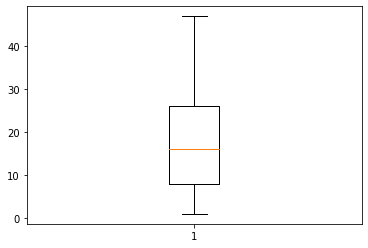

In [103]:
plt.boxplot(train['category_id'])

{'whiskers': [<matplotlib.lines.Line2D at 0x195851225b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19585122c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19585122250>],
 'medians': [<matplotlib.lines.Line2D at 0x19585115370>],
 'fliers': [<matplotlib.lines.Line2D at 0x195851156d0>],
 'means': []}

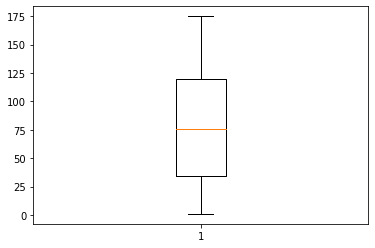

In [104]:
plt.boxplot(train['video_id'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19581f92640>,
 'caps': [<matplotlib.lines.Line2D at 0x19581f92d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19581f922e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19581fa1400>],
 'fliers': [<matplotlib.lines.Line2D at 0x19581fa1760>],
 'means': []}

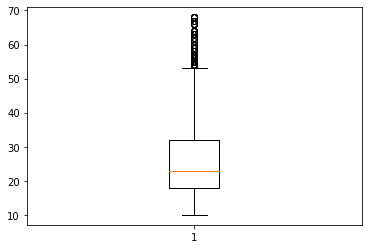

In [105]:
plt.boxplot(train['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x195814f6b80>,
 'caps': [<matplotlib.lines.Line2D at 0x195814f7850>,
 'boxes': [<matplotlib.lines.Line2D at 0x195814f66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x19581fb93d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19581fb91f0>],
 'means': []}

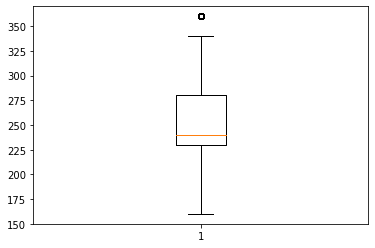

In [106]:
plt.boxplot(train['followers'])

{'whiskers': [<matplotlib.lines.Line2D at 0x195882cc5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x195882ccca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x195882cc280>],
 'medians': [<matplotlib.lines.Line2D at 0x19589b543a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19589b54700>],
 'means': []}

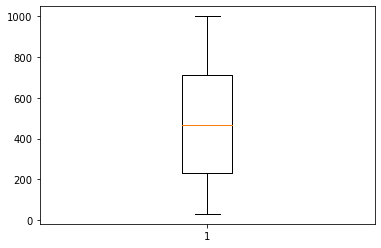

In [107]:
plt.boxplot(train['views'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1958b422b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1958b430250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1958b4227f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1958b430910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1958b430c70>],
 'means': []}

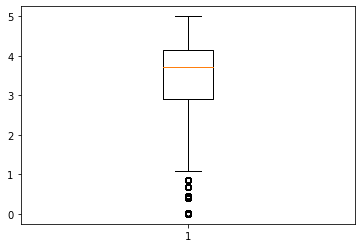

In [108]:
plt.boxplot(train['engagement_score'])

- As we can see that, in the train data there are some outliers present in the age and followers column, so further I will remove those outliers and there are different methods using which we can find the outliers

### Removing outliers of the Train data 

In [109]:
uppar_bound = train['age'].mean() + 3*train['age'].std()
lower_bound = train['age'].mean() - 3*train['age'].std()
print(uppar_bound)
print(lower_bound)

51.71522156982254
-2.0179896001374615


- Here we can see that uppar bound of the age column is 51 so here I can remove all the values which are greater than 51

In [110]:
# removing all the outliers of the age column
train[train['age']>51].index

Int64Index([   22,   429,   506,   736,  1233,  1473,  1865,  2321,  2906,
             3592,
            ...
            87078, 87197, 87429, 87611, 87614, 87818, 87921, 88694, 88721,
            89041],
           dtype='int64', length=358)

In [111]:
train.drop(index=train[train['age']>51].index, inplace=True)

In [112]:
train[train['age']>51]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score


In [113]:
uppar_bound = train['followers'].mean() + 3*train['followers'].std()
lower_bound = train['followers'].mean() - 3*train['followers'].std()
print(uppar_bound)
print(lower_bound)

390.77903483373973
114.18635198961485


In [114]:
train['followers'].quantile(0.99)

360.0

In [115]:
train[train['followers']>350].index

Int64Index([   23,    28,    41,    74,   174,   176,   198,   316,   341,
              437,
            ...
            88885, 88892, 88894, 89048, 89085, 89102, 89110, 89129, 89183,
            89186],
           dtype='int64', length=1808)

{'whiskers': [<matplotlib.lines.Line2D at 0x1958cd08790>,
 'caps': [<matplotlib.lines.Line2D at 0x1958cd08e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1958cd08430>],
 'medians': [<matplotlib.lines.Line2D at 0x1958e594550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1958e5948b0>],
 'means': []}

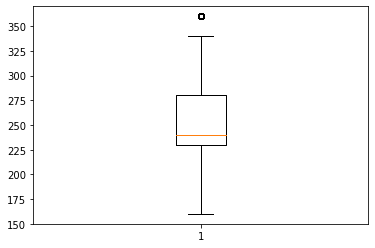

In [116]:
plt.boxplot(train['followers'])

In [117]:
# droping the outliers of the followers column
train.drop(index=train[train['followers']>350].index, inplace=True)

In [118]:
train[train['followers']>350]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score


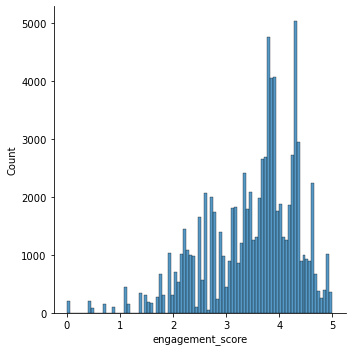

In [119]:
sns.displot(train['engagement_score'])

In [120]:
uppar_bound = train['engagement_score'].mean() + 3*train['engagement_score'].std()
lower_bound = train['engagement_score'].mean() - 3*train['engagement_score'].std()
print(uppar_bound)
print(lower_bound)

6.079578545535121
0.8929052820661334


In [121]:
train[train['engagement_score']<0.89].index

Int64Index([   12,   136,   148,   177,   204,   307,   364,   493,   570,
              623,
            ...
            88312, 88334, 88504, 88538, 88541, 88618, 88997, 89057, 89087,
            89096],
           dtype='int64', length=802)

In [122]:
# droping the outliers of the engagement score column
train.drop(index=train[train['engagement_score']<0.89].index, inplace=True)

In [123]:
train[train['engagement_score']<0.89].index

Int64Index([], dtype='int64')

{'whiskers': [<matplotlib.lines.Line2D at 0x19591527e20>,
 'caps': [<matplotlib.lines.Line2D at 0x19591534520>,
 'boxes': [<matplotlib.lines.Line2D at 0x19591527ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x19591534be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19591534f40>],
 'means': []}

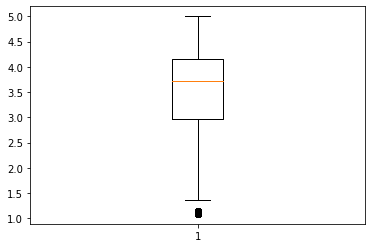

In [124]:
plt.boxplot(train['engagement_score'])

In [125]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


<AxesSubplot:>

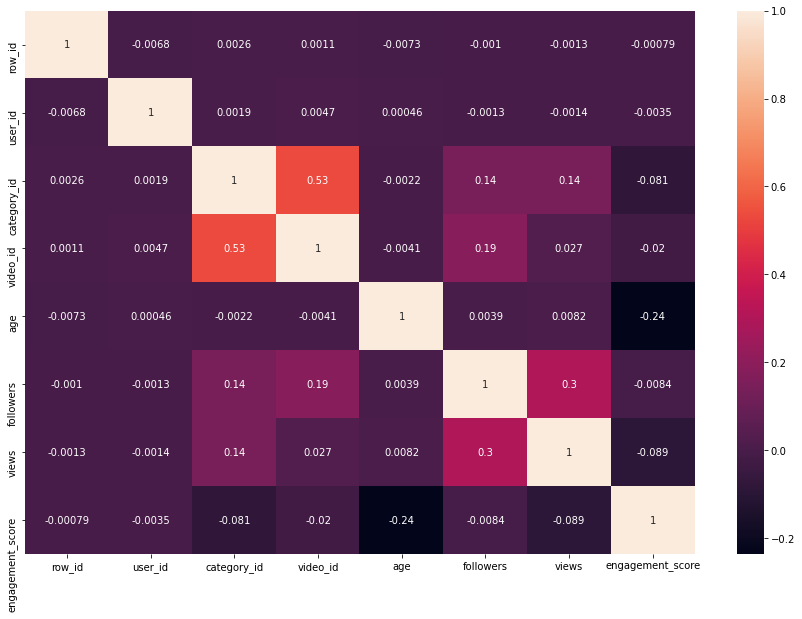

In [126]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)

In [127]:
train.shape

(86229, 10)

In [128]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


### Now I will convert the categorical features into numerical

In [129]:
gender_dummiestrain = pd.get_dummies(train['gender'], drop_first=True)

In [130]:
gender_dummiestrain.head()

,Male
0,1
1,0
2,1
3,1
4,1


In [131]:
profession_dummiestrain = pd.get_dummies(train['profession'], drop_first=True)

In [132]:
profession_dummiestrain.head()

,Student,Working Professional
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [133]:
trainmain = pd.concat([train, gender_dummiestrain, profession_dummiestrain], axis=1)

In [134]:
trainmain.drop(['gender','profession'], axis=1, inplace=True)

In [135]:
trainmain.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working Professional
0,1,19990,37,128,24,180,1000,4.33,1,1,0
1,2,5304,32,132,14,330,714,1.79,0,1,0
2,3,1840,12,24,19,180,138,4.35,1,1,0
3,4,12597,23,112,19,220,613,3.77,1,1,0
4,5,13626,23,112,27,220,613,3.13,1,0,1


### Now I will perform the same steps on the test data to convert the catogorical features into numerical

In [136]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [137]:
gender_dummiestest = pd.get_dummies(test['gender'], drop_first=True)

In [138]:
gender_dummiestest.head()

,Male
0,1
1,1
2,0
3,1
4,0


In [139]:
profession_dummiestest = pd.get_dummies(test['profession'], drop_first=True)

In [140]:
profession_dummiestest.head()

,Student,Working Professional
0,1,0
1,1,0
2,0,1
3,1,0
4,0,0


In [141]:
testmain = pd.concat([test, gender_dummiestest, profession_dummiestest], axis=1)

In [142]:
testmain.drop(['gender','profession'], axis=1, inplace=True)

In [143]:
testmain.head()

,row_id,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional
0,89198,7986,12,42,14,180,138,1,1,0
1,89199,11278,34,115,14,230,840,1,1,0
2,89200,17245,8,110,44,280,628,0,0,1
3,89201,9851,16,137,18,270,462,1,1,0
4,89202,16008,34,96,47,230,840,0,0,0


In [144]:
trainmain.shape

(86229, 11)

In [145]:
testmain.shape

(11121, 10)

### creating independent and dependent variables

In [146]:
X_train = trainmain.drop('engagement_score', axis=1)
y_train = trainmain['engagement_score']

### Now I will do feature selection on the training dataset

In [147]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00154986, 0.        , 0.0108862 , 0.0037832 , 0.33307178,
       0.00155105, 0.00982419, 0.11606659, 0.49915753, 0.34597213])

In [148]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Student                 0.499158
Working Professional    0.345972
age                     0.333072
Male                    0.116067
category_id             0.010886
views                   0.009824
video_id                0.003783
followers               0.001551
row_id                  0.001550
user_id                 0.000000
dtype: float64

<AxesSubplot:>

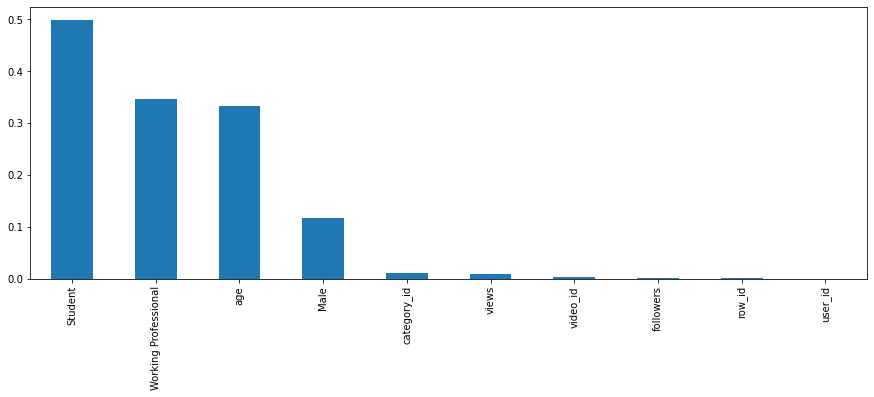

In [149]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

#### Now, here we can see that, some features are highly dependent on the dependent feature and some are not, so I can select the top 4 features to build the model, and also I can select row_id as I many need this for the final submission file format

In [150]:
trainmain.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working Professional
0,1,19990,37,128,24,180,1000,4.33,1,1,0
1,2,5304,32,132,14,330,714,1.79,0,1,0
2,3,1840,12,24,19,180,138,4.35,1,1,0
3,4,12597,23,112,19,220,613,3.77,1,1,0
4,5,13626,23,112,27,220,613,3.13,1,0,1


In [151]:
testmain.head()

,row_id,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional
0,89198,7986,12,42,14,180,138,1,1,0
1,89199,11278,34,115,14,230,840,1,1,0
2,89200,17245,8,110,44,280,628,0,0,1
3,89201,9851,16,137,18,270,462,1,1,0
4,89202,16008,34,96,47,230,840,0,0,0


#### As I have got the top featurs which I can select and build the model on those features, now I will create independent and dependent variable and also test variabel to make predictions


In [152]:
# creating independent and depedent variables 

X = trainmain[['row_id','Student','Working Professional','age','Male']]

y = trainmain['engagement_score']

X_test = testmain[['row_id','Student','Working Professional','age','Male']]

In [153]:
X.head()

,row_id,Student,Working Professional,age,Male
0,1,1,0,24,1
1,2,1,0,14,0
2,3,1,0,19,1
3,4,1,0,19,1
4,5,0,1,27,1


In [154]:
y.head()

0    4.33
1    1.79
2    4.35
3    3.77
4    3.13
Name: engagement_score, dtype: float64

In [155]:
X_test.head()

,row_id,Student,Working Professional,age,Male
0,89198,1,0,14,1
1,89199,1,0,14,1
2,89200,0,1,44,0
3,89201,1,0,18,1
4,89202,0,0,47,0


### Now, I will train the model using Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lr = LinearRegression()

In [158]:
lr.fit(X, y)

LinearRegression()

In [159]:
y_predictions = lr.predict(X_test)

In [160]:
y_predictions

array([4.02049369, 4.02049354, 2.73141014, ..., 4.01963641, 3.63136873,
       3.40399649])

In [161]:
output = pd.DataFrame({'row_id':testmain.row_id, 'engagement_score':y_predictions})

In [162]:
output.head()

,row_id,engagement_score
0,89198,4.020494
1,89199,4.020494
2,89200,2.731410
3,89201,4.020917
4,89202,2.959099


## Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
rf = RandomForestRegressor()

In [165]:
rf.fit(X,y)

RandomForestRegressor()

In [166]:
y_predictionsrf = rf.predict(X_test)

In [167]:
y_predictionsrf

array([4.3108, 4.3108, 2.5629, ..., 4.4207, 3.6456, 3.5579])

In [168]:
outputrf = pd.DataFrame({'row_id':testmain.row_id, 'engagement_score':y_predictionsrf})

In [169]:
outputrf.head()

,row_id,engagement_score
0,89198,4.3108
1,89199,4.3108
2,89200,2.5629
3,89201,4.2248
4,89202,2.7556


In [170]:
outputrf.to_csv('my_submission_rf.csv', index=False)

## XGBoost Regressor

In [171]:
import xgboost

In [172]:
classifier = xgboost.XGBRegressor()

In [173]:
classifier.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [174]:
y_predictionsxgb = classifier.predict(X_test)

In [175]:
y_predictionsxgb

array([4.2876062, 4.2876062, 3.026174 , ..., 4.332116 , 3.737542 ,
       3.6542492], dtype=float32)

In [176]:
outputxgb = pd.DataFrame({'row_id':testmain.row_id, 'engagement_score':y_predictionsxgb})

In [177]:
outputxgb.head()

,row_id,engagement_score
0,89198,4.287606
1,89199,4.287606
2,89200,3.026174
3,89201,4.272926
4,89202,2.588773


In [178]:
outputxgb.to_csv('my_submission_xgb.csv', index=False)